# Titanic Practice #

##  Read Data ##
## Titanic Dataset - Variable Definitions

| Variable   | Definition                              | Key                                         |
|------------|------------------------------------------|---------------------------------------------|
| `survival` | Survival                                 | 0 = No, 1 = Yes                             |
| `pclass`   | Ticket class                              | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| `sex`      | Sex                                       | -                                           |
| `age`      | Age in years                              | -                                           |
| `sibsp`    | Number of siblings / spouses aboard      | -                                           |
| `parch`    | Number of parents / children aboard      | -                                           |
| `ticket`   | Ticket number                             | -                                           |
| `fare`     | Passenger fare                            | -                                           |
| `cabin`    | Cabin number                              | -                                           |
| `embarked` | Port of Embarkation                       | C = Cherbourg, Q = Queenstown, S = Southampton |


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Data/train.csv')  # Replace with your file
#print(df.head())
#print (len(df))
# Basic Info
df.info()
df.describe()
#print(df.columns)
# print(df.shape)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
print(df.columns)
print(df['SibSp'])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64


Graphics to track what are some of the conditions of a surviver

<Axes: xlabel='Sex', ylabel='count'>

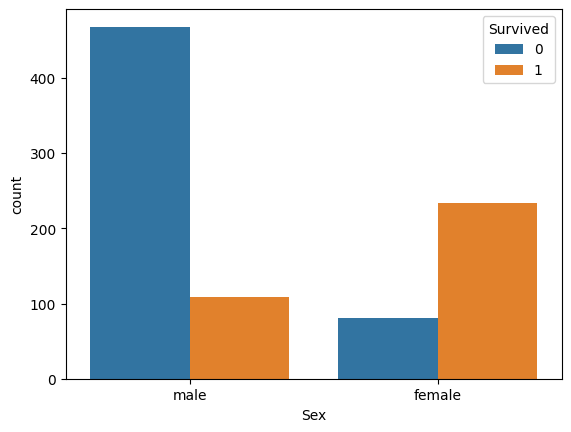

In [3]:
import seaborn as sns
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

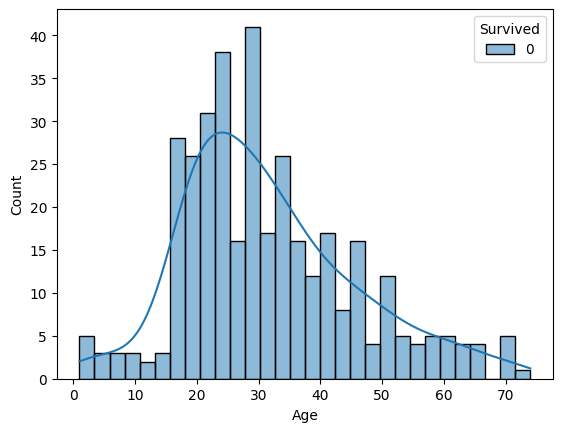

In [4]:
#sns.histplot(data=df[  df['Survived']== 1 ], x='Age', hue='Survived', bins=30, kde=True)
#sns.histplot(data=df[  df['Survived'] == 0 ], x='Age', hue='Survived', bins=30, kde=True,color ='red')
sns.histplot(data=df[   ( df['Survived'] == 0 )  & ( df['Sex']=='male' )  ], x='Age', hue='Survived', bins=30, kde=True,color ='red')

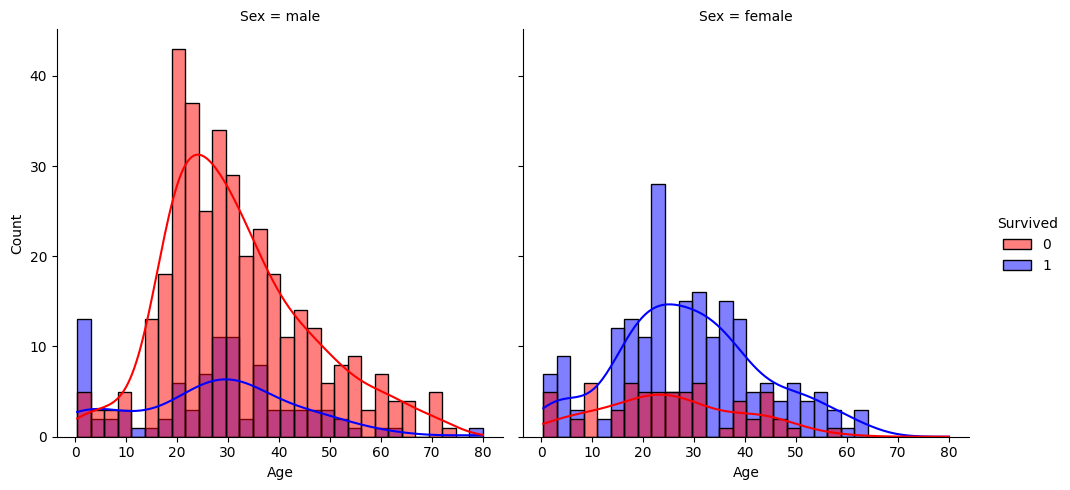

In [5]:
# sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'red', 1: 'blue'})
#sns.histplot(data=df[    df['Sex']=='female'   ], x='Age', hue='Survived', bins=30, kde=True, palette={0: 'red', 1: 'blue'})
sns.displot(
    data=df,
    x='Age',
    col='Sex',
    hue='Survived',
    bins=30,
    kde=True,
    palette={0: 'red', 1: 'blue'},
    common_norm=False  # Prevents KDE normalization across columns
)

#Women [15,50] Age
# data=df[   ( df['Survived'] == 0 )  & ( df['Sex']=='male' )  ]

<Axes: xlabel='Embarked', ylabel='count'>

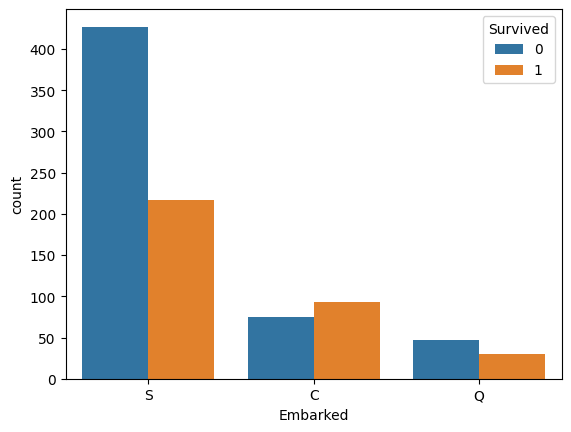

In [6]:
sns.countplot(x='Embarked', hue='Survived', data=df)

In [23]:
print(df['Cabin'] !=Nan)

NameError: name 'Nan' is not defined

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)

int64


<Axes: xlabel='SibSp', ylabel='count'>

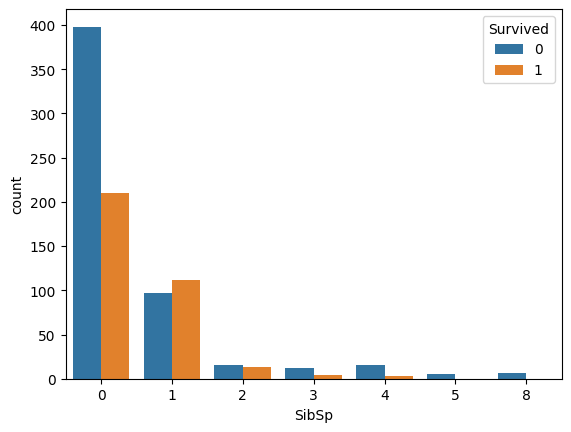

In [8]:
print(df['SibSp'].dtype)
sns.countplot(x='SibSp', hue='Survived', data=df)

<Axes: xlabel='Survived', ylabel='Fare'>

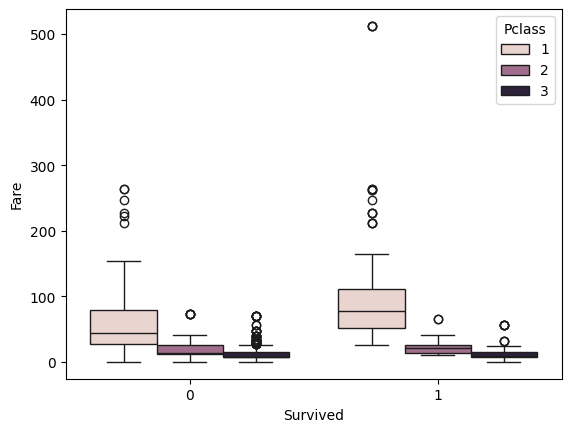

In [10]:
sns.boxplot(data=df, x="Survived", y="Fare", hue="Pclass")


In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

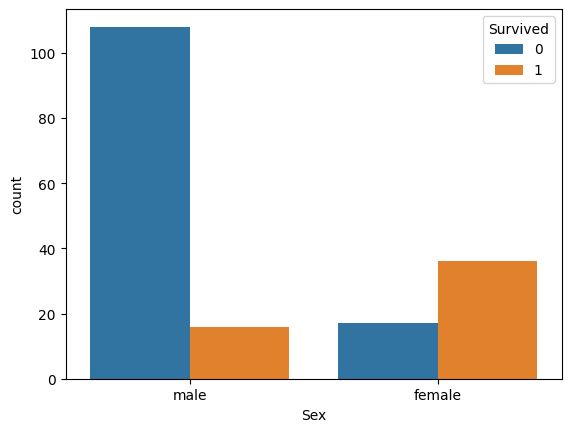

In [34]:
# See Stats of null in Age 
sns.countplot(x='Sex', hue='Survived', data=df[df['Age'].isnull()],)

<Axes: xlabel='Sex', ylabel='count'>

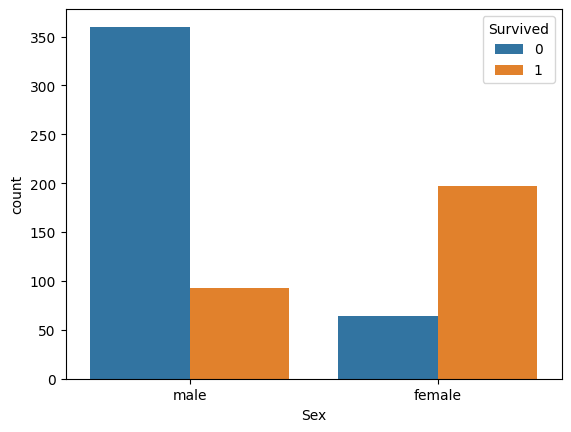

In [38]:
sns.countplot(
    x='Sex', 
    hue='Survived', 
    data=df[df['Age'].notnull()],)


In [54]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill Embarked with mode
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

# Optional: Create indicator for missing Age
df['Age_missing'] = df['Age'].isnull().astype(int)
df.isnull().sum()


C:\Users\erwin\AppData\Local\Temp\ipykernel_16404\2225619890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\erwin\AppData\Local\Temp\ipykernel_16404\2225619890.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_missing    0
dtype: int64